In [43]:
def push(message):
    """
    Save current notebook and push whole current dir to origin/master
    
    Param:
        message : str 
            Commit's message
    
    Return:
        None
    """
    assert(len(message.strip())>10)
    import subprocess
    from IPython.display import display, Javascript
    
    cmds = [  "git add .",
              "git commit -m ", 
              "git push"]
    
    # save current notebook
    display(Javascript('IPython.notebook.save_checkpoint();'))
    for cmd in cmds:
        cmd = cmd.split()
        if "commit" in cmd: 
            cmd.append( f"'{message}'") 
        print(" ".join(cmd))
        subprocess.check_output(cmd)
    print("Fini.")

In [1]:
import pandas as pd

# 1) création de catégories

In [6]:
jours = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
jours

['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']

## 1.0) Transformation d'une liste de valeurs en une liste de catégorie (pas très utile sans le remettre dans une datframe)

In [25]:
categorie = pd.Categorical(jours, # -> liste de valeurs à changer en catégorie 
                           categories=jours, # -> les catégories à appliquer
                           ordered=True ) # -> le fait que les catégories sont ordonnées

In [26]:
categorie # une liste de valeur dont les valeurs sont désormais ordonnables

['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']
Categories (7, object): ['lundi' < 'mardi' < 'mercredi' < 'jeudi' < 'vendredi' < 'samedi' < 'dimanche']

## 1.1) application sur une dataframe

In [34]:
df = pd.DataFrame(jours)

In [35]:
df.columns = ["jours"] # renommage de la colonne 0 en jours

In [36]:
df2 = df.append(df)

#### Transforme une colonne de string en une colonne ordonnée de catégories => ce qui va me permettrre de faire un tri ensuite

In [38]:
df2["jours"] = pd.Categorical(df2.jours, categories=jours, ordered=True)

## 1.2) La fonction *sort_value* permet de trier la df selon une colonne 

In [41]:
df2.sort_values("jours")

,jours
0,lundi
0,lundi
1,mardi
1,mardi
2,mercredi
2,mercredi
3,jeudi
3,jeudi
4,vendredi
4,vendredi


# 2) Cas d'usage : ajoutons une colonne de moyen de communication dont on veut préciser une importance métier

In [42]:
moyen_de_communication = ["twitter", "mail", "téléphone", "rdv physique"]

In [44]:
push("pour suivre")

<IPython.core.display.Javascript object>

git add .
git commit -m 'pour suivre'
git push
Fini.


In [45]:
import random 

### Trois moyen de récupérer la longueur d'une df

In [46]:
df2.count()

jours    14
dtype: int64

In [47]:
df2.shape

(14, 1)

In [48]:
len(df2)

14

## 2.1) Ajout d'une colonne avec des mots qui n'ont pas d'ordre naturel

In [50]:
df2["KindOfCommunication"] = [random.choice(moyen_de_communication) for _ in range(len(df2))]

In [51]:
df2

,jours,KindOfCommunication
0,lundi,rdv physique
1,mardi,mail
2,mercredi,rdv physique
3,jeudi,twitter
4,vendredi,téléphone
5,samedi,rdv physique
6,dimanche,téléphone
0,lundi,mail
1,mardi,rdv physique
2,mercredi,mail


In [52]:
df2.dtypes

jours                  category
KindOfCommunication      object
dtype: object

### Tri dans l'ordre naturel => fonction sorted

In [54]:
sorted(moyen_de_communication, reverse=True)

['téléphone', 'twitter', 'rdv physique', 'mail']

## 2.2) Tri dans un ordre imposé (par l'ordre de la liste des catégories)

In [55]:
df2.KindOfCommunication = pd.Categorical(df2.KindOfCommunication, 
                                         categories=moyen_de_communication, 
                                         ordered=True)

In [56]:
df2.dtypes

jours                  category
KindOfCommunication    category
dtype: object

In [58]:
df2.sort_values("KindOfCommunication")

,jours,KindOfCommunication
3,jeudi,twitter
1,mardi,mail
0,lundi,mail
2,mercredi,mail
5,samedi,mail
4,vendredi,téléphone
6,dimanche,téléphone
3,jeudi,téléphone
4,vendredi,téléphone
0,lundi,rdv physique


## 2.3) Application de mask sur des comparaisons de l'ordre catégoriel

In [59]:
# J'applique une opération mathématique de comparaison sur une chaine de caractère
# et sur un ensemble de chaîne de caractère
# sur une catégorie en fait
# utile dans les phases de "feature engineering" => c.a.d. la création de colonnes avant la création d'algorithme

contact_humain = "mail" < df2.KindOfCommunication 

In [61]:
df2["contact_humain"] = contact_humain

In [64]:
df2.sort_values(["contact_humain", "jours"])

,jours,KindOfCommunication,contact_humain
0,lundi,mail,False
1,mardi,mail,False
2,mercredi,mail,False
3,jeudi,twitter,False
5,samedi,mail,False
0,lundi,rdv physique,True
1,mardi,rdv physique,True
2,mercredi,rdv physique,True
3,jeudi,téléphone,True
4,vendredi,téléphone,True


## 2.4) Pivot table => tableau croisés dynamiques

In [108]:
pivot = df2.pivot_table(index="contact_humain", columns="jours", values="KindOfCommunication", aggfunc="count")
pivot

jours,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
contact_humain,,,,,,,
False,1,1,1,1,0,1,0
True,1,1,1,1,2,1,2


### Margin = True rajoute une colonne et une ligne "somme" en fin de tableau

In [112]:
pivot = df2.pivot_table(                         columns="jours", 
                        index="contact_humain",  values="KindOfCommunication", 
                                                 aggfunc="count", 
                        margins=True)
pivot

jours,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche,All
contact_humain,,,,,,,,
False,1,1,1,1,0,1,0,5
True,1,1,1,1,2,1,2,9
All,2,2,2,2,2,2,2,14


## 2.4 bis) Calculer un pourcentage ligne par ligne

In [117]:
pivot = df2.pivot_table(                         columns="jours", 
                        index="contact_humain",  values="KindOfCommunication", 
                                                 aggfunc="count", 
                        )
pivot

jours,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
contact_humain,,,,,,,
False,1,1,1,1,0,1,0
True,1,1,1,1,2,1,2


In [128]:
somme_par_ligne             = pivot.sum(axis=1)
pourcentage_ligne_par_ligne = pivot.div(somme_par_ligne, axis=0)*100

pourcentage_ligne_par_ligne.applymap(lambda x: f"{x: 2.2f}%")

jours,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
contact_humain,,,,,,,
False,20.00%,20.00%,20.00%,20.00%,0.00%,20.00%,0.00%
True,11.11%,11.11%,11.11%,11.11%,22.22%,11.11%,22.22%


## 2.4 ter) Calculer un pourcentage colonne par colonne

In [134]:
somme_par_colonne               = pivot.sum(axis=0)
pourcentage_colonne_par_colonne = pivot.div(somme_par_colonne, axis=1)*100
pourcentage_colonne_par_colonne.applymap(lambda x: f"{x: 3.2f} %")

jours,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
contact_humain,,,,,,,
False,50.00 %,50.00 %,50.00 %,50.00 %,0.00 %,50.00 %,0.00 %
True,50.00 %,50.00 %,50.00 %,50.00 %,100.00 %,50.00 %,100.00 %


### Sortie html

In [71]:
pivot.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>jours</th>\n      <th>lundi</th>\n      <th>mardi</th>\n      <th>mercredi</th>\n      <th>jeudi</th>\n      <th>vendredi</th>\n      <th>samedi</th>\n      <th>dimanche</th>\n    </tr>\n    <tr>\n      <th>contact_humain</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>False</th>\n      <td>1</td>\n      <td>1</td>\n      <td>1</td>\n      <td>1</td>\n      <td>0</td>\n      <td>1</td>\n      <td>0</td>\n    </tr>\n    <tr>\n      <th>True</th>\n      <td>1</td>\n      <td>1</td>\n      <td>1</td>\n      <td>1</td>\n      <td>2</td>\n      <td>1</td>\n      <td>2</td>\n    </tr>\n  </tbody>\n</table>'

## 2.4.1) Transposée du pivot / de la df

In [84]:
pivot.T

contact_humain,False,True
jours,,
lundi,1,1
mardi,1,1
mercredi,1,1
jeudi,1,1
vendredi,0,2
samedi,1,1
dimanche,0,2


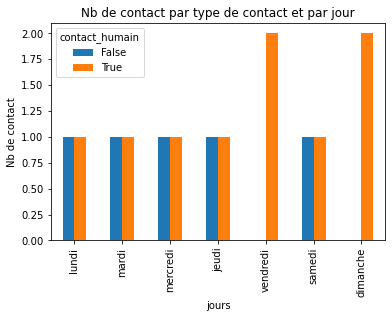

In [98]:
pivot.T.plot.bar(ylabel="Nb de contact", title="Nb de contact par type de contact et par jour");

In [99]:
push("pause du matin")

<IPython.core.display.Javascript object>

git add .
git commit -m 'pause du matin'
git push
Fini.


In [100]:
url_vers_csv = "https://raw.githubusercontent.com/romainjouin/formation_python/master/cyclistes.csv"
cyclistes = pd.read_csv(url_vers_csv, nrows=30)

In [ ]:
pd.read_sql_table()

# 3) pivottablejs

In [101]:
!pip install pivottablejs

In [102]:
from pivottablejs import pivot_ui

In [106]:
pivot_ui(cyclistes)